# i . Perkenalan

-------------------------------
Name        : Betara Candra

Batch       : SBY 002

Data        : [Dataset](https://www.kaggle.com/datasets/mohamedharris/employee-satisfaction-index-dataset)

Objective   :  To make model that can minimize False Positive as lower as possible. Meaning of False Positive like prediction is Satisfied but the actual is not satisfied.

------------------------------

This dataset is containing about data that can support predict employe satisfied. 

Job satisfaction is a big factor in employee engagement and the level of discretionary effort team members are likely to make. No doubt, people’s work performance suffers when they don’t feel satisfied with their jobs, not to mention their quality of life. [Link](iedunote.com/factors-affecting-job-satisfaction) 



# ii. Import Libraries

In [1]:
# Calculate number
import pandas as pd
import numpy as np
# Hypotesis test
from scipy import stats
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# Cross Validasi
from sklearn.model_selection import cross_val_score
# Hyperparameter Tuning : Grid Search
from sklearn.model_selection import GridSearchCV
# Hyperparameter Tuning : Random Search
from sklearn.model_selection import RandomizedSearchCV
# Ignore Warning 
import warnings
warnings.filterwarnings('ignore') #turn off warning
# Time
import time
# Model saving
import pickle
import json

# iii. Data Loading

In [2]:
df = pd.read_csv('Employee Satisfaction Index.csv')

In [3]:
df.head(10) 

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
5,5,PUR7265,40,Purchasing,Suburb,UG,Referral,3,3,0,7,1,42419,1
6,6,PUR1466,26,Purchasing,Suburb,UG,Referral,5,5,0,2,0,86750,0
7,7,TECH5426,25,Technology,City,UG,Recruitment Agency,1,1,0,4,0,24076,0
8,8,HR6578,35,HR,City,PG,Referral,3,4,0,0,0,42419,1
9,9,TECH9322,45,Technology,City,PG,Referral,3,3,0,9,0,42419,0


In [4]:
df.tail(10)

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
490,490,PUR7541,47,Purchasing,Suburb,UG,Recruitment Agency,4,4,0,6,1,65715,0
491,491,TECH5729,23,Technology,City,PG,On-Campus,3,1,0,7,0,42419,0
492,492,HR8330,33,HR,City,UG,On-Campus,3,5,1,6,1,42419,1
493,493,MKT6334,41,Marketing,City,UG,Walk-in,5,4,0,2,0,86750,0
494,494,SAL9924,31,Sales,Suburb,PG,Referral,3,3,0,1,0,42419,1
495,495,HR5330,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805,1
496,496,TECH9010,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
497,497,MKT7801,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076,1
498,498,TECH5846,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0
499,499,TECH7731,26,Technology,City,UG,Recruitment Agency,3,4,0,3,0,42419,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        500 non-null    int64 
 1   emp_id            500 non-null    object
 2   age               500 non-null    int64 
 3   Dept              500 non-null    object
 4   location          500 non-null    object
 5   education         500 non-null    object
 6   recruitment_type  500 non-null    object
 7   job_level         500 non-null    int64 
 8   rating            500 non-null    int64 
 9   onsite            500 non-null    int64 
 10  awards            500 non-null    int64 
 11  certifications    500 non-null    int64 
 12  salary            500 non-null    int64 
 13  satisfied         500 non-null    int64 
dtypes: int64(9), object(5)
memory usage: 54.8+ KB


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,HR5330,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805,1
496,TECH9010,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
497,MKT7801,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076,1
498,TECH5846,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,500.0,38.610,9.438648,23.0,30.0,39.0,47.0,54.0
job_level,500.0,3.032,1.423738,1.0,2.0,3.0,4.0,5.0
rating,500.0,3.072,1.425089,1.0,2.0,3.0,4.0,5.0
onsite,500.0,0.466,0.499342,0.0,0.0,0.0,1.0,1.0
awards,500.0,4.538,2.853215,0.0,2.0,5.0,7.0,9.0
certifications,500.0,0.496,0.500485,0.0,0.0,0.0,1.0,1.0
salary,500.0,50416.056,23671.392661,24076.0,29805.0,42419.0,65715.0,86750.0
satisfied,500.0,0.526,0.499824,0.0,0.0,1.0,1.0,1.0


In [9]:
df.isnull().sum()

emp_id              0
age                 0
Dept                0
location            0
education           0
recruitment_type    0
job_level           0
rating              0
onsite              0
awards              0
certifications      0
salary              0
satisfied           0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
pd.set_option('display.max_columns', None)
df

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,HR5330,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805,1
496,TECH9010,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
497,MKT7801,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076,1
498,TECH5846,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0


In [12]:
df.nunique()

emp_id              499
age                  32
Dept                  5
location              2
education             2
recruitment_type      4
job_level             5
rating                5
onsite                2
awards               10
certifications        2
salary                5
satisfied             2
dtype: int64

# v. Exploratory Data Analysis (EDA)

## 1. Distribution age of employee

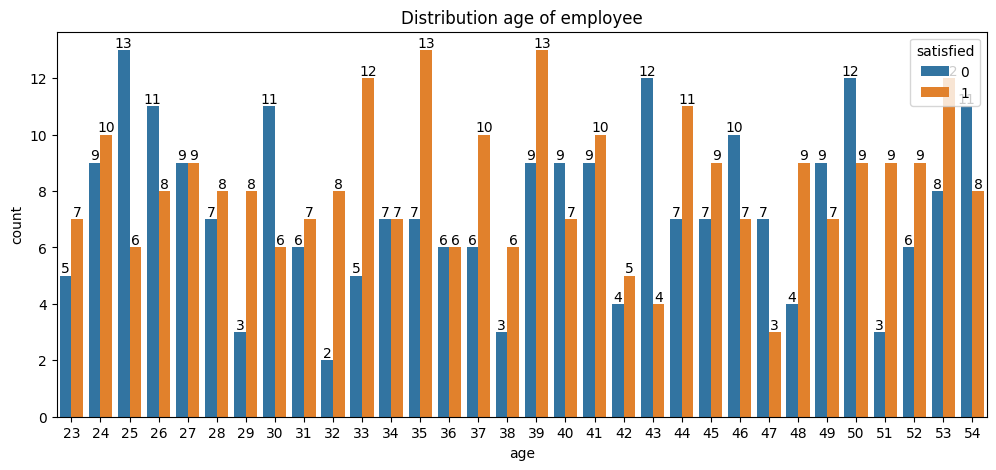

In [13]:
plt.figure(figsize=(12,5))
ax = sns.countplot(df,x='age', hue='satisfied',)
plt.title('Distribution age of employee')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Barplot that show age result in satisfied of employee. Employee that has age in 35 and 39 most satisfied with the job, but in correlation age have 0.004490 so i drop it in features

## 2. Correlation about certifications on satisfied

In [14]:
corr_tau, pval_k = stats.kendalltau(df['recruitment_type'],df['satisfied'])
print('tau-correlation:',corr_tau)
print('P-value:',pval_k) #

tau-correlation: -0.03098407077043639
P-value: 0.44853690306103633


Correlation about recruitment type on satisfied is to small, so i decide don't use in features

## 3. Job Level on Satisfied

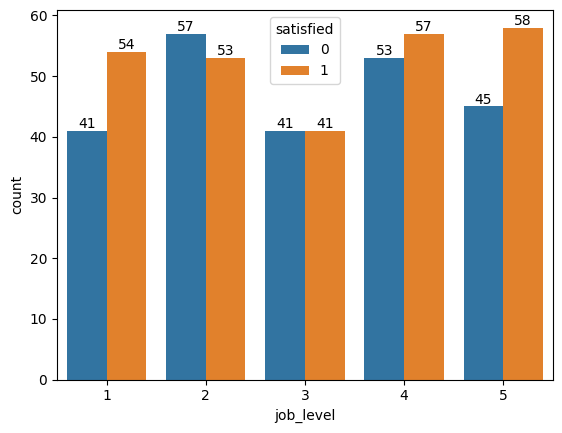

In [15]:
# Plot for count of job level on satisfied
ax = sns.countplot(data = df, x='job_level',hue='satisfied' )
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Where job level is in 5, many satisfied workers.

In this [artikel](https://www.trinamics.nl/en/blogs/6-factors-for-your-job-satisfaction) that show where your works are challenging,this creates a challenge. cause boredom is more likely to strike when the work becomes monotonous and not challenging.

In this [artikel](https://www.trinamics.nl/en/blogs/6-factors-for-your-job-satisfaction) show that the level of the salary is an important factor of employee satisfied

## 4. Distribution of Education

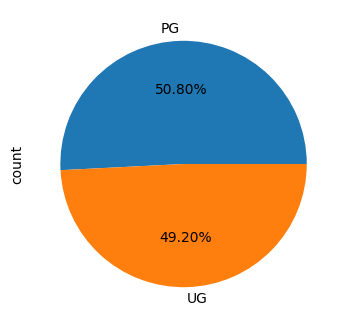

In [16]:
# plotting data on chart 
fig,ax1 = plt.subplots(figsize=(6,4))

df['education'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

Employee in this datase has 50% of PG education status and 49.29% UG. 

## 5. Distribution rating 

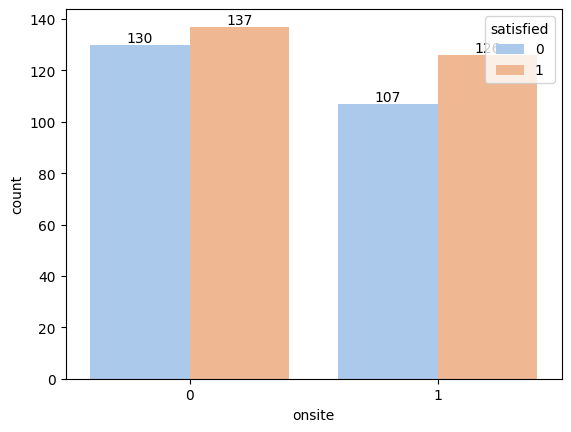

In [17]:
# Plot for count of job level on satisfied
ax = sns.countplot(data = df, x='onsite',hue='satisfied',palette='pastel' )
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Many employee not on site has more satisfied, so i use on site to features

## Distribution of rating

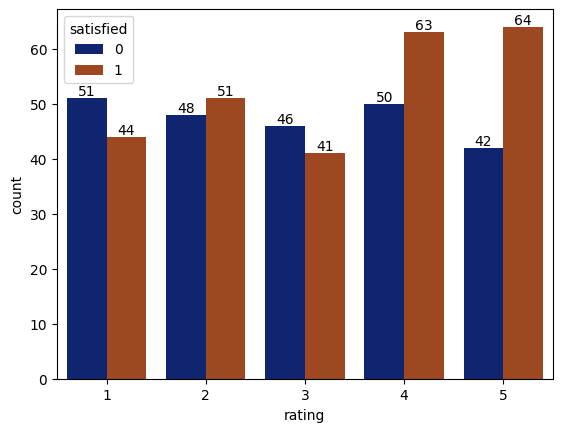

In [18]:
# Plot for count of job level on satisfied
ax = sns.countplot(data = df, x='rating',hue='satisfied',palette='dark' )
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Employee that have 4 or 5 rating, more satisfied with their job. So rating can be correlation on employee satisfied

# vi. Feature Engineering

In [19]:
df

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,HR5330,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805,1
496,TECH9010,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
497,MKT7801,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076,1
498,TECH5846,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0


## 1. Split X and y

In [20]:
X = df.drop('satisfied', axis=1 ) # drop column satisfied on X
y = df['satisfied']                # Use columns satisfied on y

In [21]:
X

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary
0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715
3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805
4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805
...,...,...,...,...,...,...,...,...,...,...,...,...
495,HR5330,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805
496,TECH9010,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805
497,MKT7801,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076
498,TECH5846,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805


## 2. Split Train set and Test set

In [22]:
# Split X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  # Split X_test and X_train in 20% of X_train
                                                    stratify=y,             # Split will follow the distribution of y
                                                    random_state=2)         # Split will choose random data

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)
X_train

print('Train Size :', y_train.shape)
print('Test Size :', y_test.shape)

Train Size : (400, 12)
Test Size : (100, 12)
Train Size : (400,)
Test Size : (100,)


In [23]:
y.value_counts()

satisfied
1    263
0    237
Name: count, dtype: int64

On target the data is quite balanced 263 for 1 on 237 for 0, so i not use smote or balanced the targe

## 3. Feature Selection 

In [24]:
X

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary
0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715
3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805
4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805
...,...,...,...,...,...,...,...,...,...,...,...,...
495,HR5330,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805
496,TECH9010,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805
497,MKT7801,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076
498,TECH5846,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805


In [25]:
# Use drop to feature selection
X_train.drop(columns=['emp_id','age','recruitment_type','certifications','education'],axis = 1,inplace=True)  # emp_id to many unique value
X_test.drop(columns=['emp_id','age','recruitment_type','certifications','education'],axis = 1,inplace=True)     
X_train

,Dept,location,job_level,rating,onsite,awards,salary
482,Marketing,Suburb,5,2,1,6,86750
172,Technology,Suburb,1,4,1,3,24076
289,HR,Suburb,5,4,0,0,86750
354,HR,City,3,4,1,4,42419
268,HR,Suburb,5,2,1,2,86750
...,...,...,...,...,...,...,...
192,Sales,City,2,3,0,9,29805
372,Marketing,Suburb,5,1,0,4,86750
251,Purchasing,Suburb,5,5,0,7,86750
1,Technology,Suburb,3,5,1,2,42419


In [26]:
X_test 

,Dept,location,job_level,rating,onsite,awards,salary
426,HR,Suburb,3,2,1,6,42419
182,Technology,Suburb,1,4,1,4,24076
314,Sales,Suburb,1,5,1,9,24076
50,HR,Suburb,5,4,1,5,86750
368,HR,Suburb,5,1,0,7,86750
...,...,...,...,...,...,...,...
408,Purchasing,City,5,5,1,8,86750
376,Marketing,City,4,4,0,5,65715
3,Sales,City,2,3,1,0,29805
351,Purchasing,City,5,2,1,8,86750


## 4. Split numerical columns and categorical columns

In [27]:
X_train

,Dept,location,job_level,rating,onsite,awards,salary
482,Marketing,Suburb,5,2,1,6,86750
172,Technology,Suburb,1,4,1,3,24076
289,HR,Suburb,5,4,0,0,86750
354,HR,City,3,4,1,4,42419
268,HR,Suburb,5,2,1,2,86750
...,...,...,...,...,...,...,...
192,Sales,City,2,3,0,9,29805
372,Marketing,Suburb,5,1,0,4,86750
251,Purchasing,Suburb,5,5,0,7,86750
1,Technology,Suburb,3,5,1,2,42419


In [28]:
X_train.columns

Index(['Dept', 'location', 'job_level', 'rating', 'onsite', 'awards',
       'salary'],
      dtype='object')

In [29]:
# This column numeric and categoric are define 
num_col = ['awards','salary']
cat_col_o = ['job_level','rating']
cat_col_n = ['Dept','location','onsite']

In [30]:
# Define X_train and X_test numeric and categorical columns
X_train_num = X_train[num_col]
X_test_num = X_test[num_col]

In [31]:
# Define ordinal columns for herarki categoric
X_train_col_nominal = X_train[cat_col_n]
X_test_col_nominal = X_test[cat_col_n]

In [32]:
X_train_col_nominal

,Dept,location,onsite
482,Marketing,Suburb,1
172,Technology,Suburb,1
289,HR,Suburb,0
354,HR,City,1
268,HR,Suburb,1
...,...,...,...
192,Sales,City,0
372,Marketing,Suburb,0
251,Purchasing,Suburb,0
1,Technology,Suburb,1


In [33]:
# Define nominal columns
X_train_col_ordinal = X_train[cat_col_o]
X_test_col_ordinal = X_test[cat_col_o]

In [34]:
X_train_col_ordinal

,job_level,rating
482,5,2
172,1,4
289,5,4
354,3,4
268,5,2
...,...,...
192,2,3
372,5,1
251,5,5
1,3,5


This data numeric have skew distribution

## 5. Handling Outlier

Outlier of awards


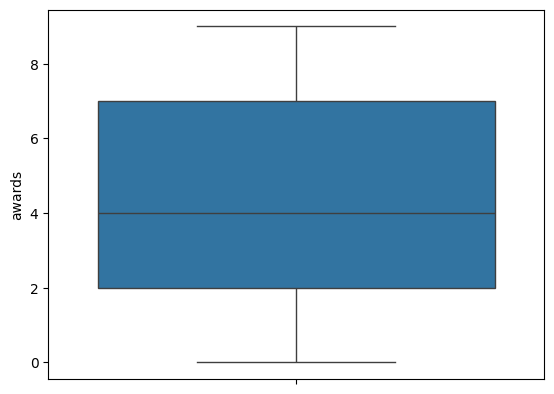

Outlier of salary


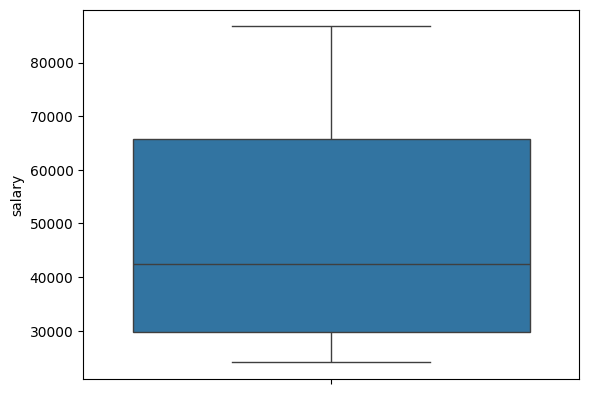

In [35]:
# Show the outlier using boxplot
for i in X_train_num :
    sns.boxplot(y=X_train_num[i])
    print('Outlier of', i)
    plt.show()
    i =+ 1


There is no outlier

### 6. Handling Missing Values

Feature and target does'nt have any missing value, 

## 6. Feature Scaling

In [36]:
# Use the MinaMax because the data is normal
scaler = StandardScaler()
scaler.fit(X_train_num)

StandardScaler()

In [37]:
# Transform X_train and X_test
X_train_num_scaled_n = scaler.transform(X_train_num) 
X_test_num_scaled_n = scaler.transform(X_test_num)

In [38]:
X_train_num_scaled_n

array([[ 0.52005137,  1.59874213],
       [-0.54672067, -1.08418131],
       [-1.6134927 ,  1.59874213],
       [-0.19112999, -0.29896153],
       [-0.90231134,  1.59874213],
       [-0.19112999,  0.69828429],
       [-1.6134927 ,  0.69828429],
       [ 0.87564204, -1.08418131],
       [ 0.16446069, -0.83893658],
       [-1.25790202, -0.29896153],
       [ 0.52005137,  1.59874213],
       [-0.54672067, -0.83893658],
       [-0.19112999,  1.59874213],
       [ 0.16446069,  0.69828429],
       [ 0.16446069,  0.69828429],
       [ 0.87564204, -0.29896153],
       [-0.19112999,  0.69828429],
       [ 1.5868234 , -1.08418131],
       [ 0.16446069,  0.69828429],
       [-0.19112999,  0.69828429],
       [-1.6134927 , -0.29896153],
       [-1.6134927 , -0.83893658],
       [-0.90231134,  1.59874213],
       [ 0.52005137,  0.69828429],
       [ 0.52005137, -0.83893658],
       [-0.19112999, -1.08418131],
       [ 0.52005137, -0.29896153],
       [-1.25790202, -0.29896153],
       [ 0.16446069,

## 7. Feature Encoding

### 7.1 Ordinal

In [39]:
X_train_col_ordinal

,job_level,rating
482,5,2
172,1,4
289,5,4
354,3,4
268,5,2
...,...,...
192,2,3
372,5,1
251,5,5
1,3,5


In [40]:
# Try to make example unique in column pay
df['rating'].sort_values().unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [41]:
# in categories i input data that unique of pay_ have
encoder = OrdinalEncoder(categories=[[1, 2, 3, 4, 5],   # Unique of job level
                                    [1, 2, 3, 4, 5]])   # Unique of rating  


In [42]:
encoder.fit(X_train_col_ordinal)

OrdinalEncoder(categories=[[1, 2, 3, 4, 5], [1, 2, 3, 4, 5]])

In [43]:
# Transform X_train and X_test
X_train_cat_encoded_o = encoder.transform(X_train_col_ordinal)
X_test_cat_encoded_o = encoder.transform(X_test_col_ordinal)

In [44]:
X_train_cat_encoded_o

array([[4., 1.],
       [0., 3.],
       [4., 3.],
       [2., 3.],
       [4., 1.],
       [3., 3.],
       [3., 4.],
       [0., 2.],
       [1., 4.],
       [2., 0.],
       [4., 4.],
       [1., 0.],
       [4., 4.],
       [3., 2.],
       [3., 3.],
       [2., 2.],
       [3., 4.],
       [0., 3.],
       [3., 0.],
       [3., 2.],
       [2., 2.],
       [1., 4.],
       [4., 3.],
       [3., 0.],
       [1., 1.],
       [0., 3.],
       [2., 2.],
       [2., 0.],
       [0., 1.],
       [2., 0.],
       [3., 2.],
       [1., 4.],
       [0., 4.],
       [3., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [3., 3.],
       [1., 3.],
       [2., 1.],
       [1., 4.],
       [0., 1.],
       [0., 1.],
       [3., 0.],
       [4., 3.],
       [3., 4.],
       [2., 3.],
       [0., 3.],
       [2., 0.],
       [0., 0.],
       [4., 4.],
       [0., 1.],
       [2., 1.],
       [3., 3.],
       [3., 0.],
       [3., 3.],
       [2., 4.],
       [0., 1.],
       [3., 4.

### 7.2 Nominal 

In [45]:
# Use OneHotEncoder cause it's numeric categoric
encoder_n = OneHotEncoder(categories='auto', sparse=False, drop='first')
encoder_n.fit(X_train_col_nominal)

OneHotEncoder(drop='first', sparse=False, sparse_output=False)

In [46]:
# Transform data that already define in X_train_col_nominal and X_test_col_nominal
X_train_cat_encoded_n = encoder_n.transform(X_train_col_nominal)
X_test_cat_encoded_n = encoder_n.transform(X_test_col_nominal)

In [47]:
X_train_cat_encoded_n

array([[1., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 1.]])

### 8. Merge (concat) data

In [48]:
# Use concat to merge data that already scalled and encoder
X_train_final = np.concatenate([X_train_num_scaled_n,X_train_cat_encoded_o, X_train_cat_encoded_n],axis=1)
X_test_final = np.concatenate([X_test_num_scaled_n, X_test_cat_encoded_o,X_test_cat_encoded_n],axis=1)
X_train_final[0]

array([0.52005137, 1.59874213, 4.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ])

# vii. Model Definition

## 1. Decision Tree Classifier

In [49]:
# Define decisis tree
model_dt = DecisionTreeClassifier()

## 2. Support Vector Machine

In [50]:
# Define the model with SVM
svc = SVC()

This model is designed  for Binary Classification

### 3. K-Nearest Neighbors (KNN)

In [51]:
# Define the model with KNeighborsClassifier
knn = KNeighborsClassifier()

The model of KNNegihbors has advantages that will performs well in small size dataset

This 3 model are type of Supervised Learning algorithm that predict binary clasification with 2 categories. 1 and 0

## 4. Random Forest

In [52]:
# Define the model with random forest
rndm = RandomForestClassifier()

## 5. Boosting

In [53]:
ada_clf = AdaBoostClassifier()

# viii. Model Training

## 1. Training Decision Tree

In [54]:
# Training using  SVM
start_time = time.time()
model_dt.fit(X_train_final, y_train)
print("Process finished --- %s seconds ---" % (time.time() - start_time))

Process finished --- 0.007976293563842773 seconds ---


## 2. Training SVC

In [55]:
# Training using  SVM
start_time = time.time()
svc.fit(X_train_final, y_train)
print("Process finished --- %s seconds ---" % (time.time() - start_time))

Process finished --- 0.01596975326538086 seconds ---


## 3. Training KNeighborsClassifier

In [56]:
# Training using KNeighborsClassifier
start_time = time.time()
knn.fit(X_train_final, y_train)
print("Process finished --- %s seconds ---" % (time.time() - start_time))

Process finished --- 0.007981300354003906 seconds ---


## 4. Training Random Forest

In [57]:
# Training using Random Forest
start_time = time.time()
rndm.fit(X_train_final, y_train)
print("Process finished --- %s seconds ---" % (time.time() - start_time))

Process finished --- 0.26981186866760254 seconds ---


## 5. Training Adabost

In [58]:
# Training using Random Forest
start_time = time.time()
ada_clf.fit(X_train_final, y_train)
print("Process finished --- %s seconds ---" % (time.time() - start_time))

Process finished --- 0.12646698951721191 seconds ---


# ix. Model Evaluation

In [59]:
# Save Classification Report into a Dictionary

all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name,model):
  # Cross Validation 
  mean = cross_val_score(model,
                         X_train_final,
                         y_train,
                         cv=3,
                         scoring="precision")
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
      'mean - cross validation': mean.mean()
  }
  all_reports[name] = score_reports
  return all_reports


## 1. Model Decision Tree

In [60]:
# Model Prediction
start_time = time.time()
y_pred_train_dt = model_dt.predict(X_train_final)
y_pred_test_dt = model_dt.predict(X_test_final)

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Process finished --- 0.0 seconds ---


In [61]:
all_reports = performance_report(all_reports, y_train, y_pred_train_dt, y_test, y_pred_test_dt,"Baseline DT",model_dt)
pd.DataFrame(all_reports)

,Baseline DT
mean - cross validation,0.530321
test - accuracy_score,0.510000
test - f1_score,0.542056
test - precision,0.537037
test - recall,0.547170
train - accuracy,0.985000
train - f1_score,0.985507
train - precision,1.000000
train - recall,0.971429


Because my object is to search best precesion, so let's look in train, test precision and mean cross validation. In Decision tree result is to overfit. It's means train has bigger value than test. In mean it's see not look good to in decision tree. So model will procedure perfom on 0.53 average

Test: 
 0.5370370370370371 

Train: 
 1.0


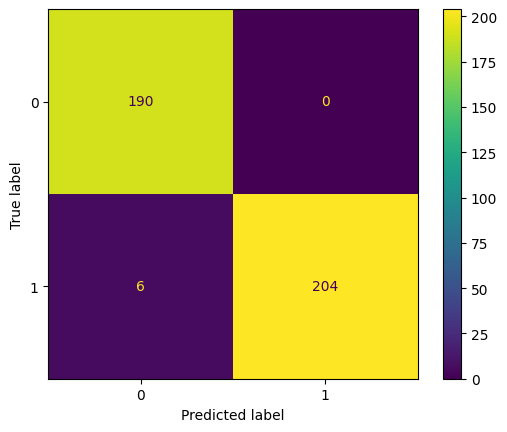

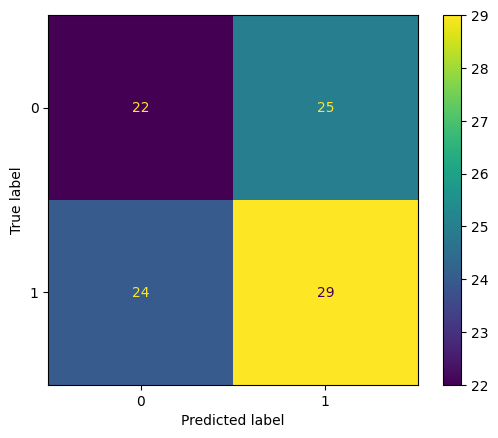

In [62]:
# Define data to consusion matrix display
cm_test = confusion_matrix(y_test, y_pred_test_dt)
print('Test: \n', precision_score(y_test, y_pred_test_dt), '\n')
# Define data to consusion matrix display
cm_train = confusion_matrix(y_train, y_pred_train_dt)
ConfusionMatrixDisplay(cm_train).plot()

# Define data to consusion matrix display
print('Train: \n', precision_score(y_train, y_pred_train_dt), )
# Define data to consusion matrix display
cm_test = confusion_matrix(y_test, y_pred_test_dt)
ConfusionMatrixDisplay(cm_test).plot()



Let's focus on False Positive. Meaning of False Positive like prediction is Satisfied but the actual is not satisfied. In model Decision tree is so overfit, can see at confusion matrix the value is 0 in test but in train the values is 25. The model can use to predict satisfied

## 2. Model Evaluation Support Vector Machine

In [63]:
# Model Prediction
start_time = time.time()
y_pred_train_svc = svc.predict(X_train_final)
y_pred_test_svc = svc.predict(X_test_final)

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Process finished --- 0.02166604995727539 seconds ---


In [64]:
all_reports = performance_report(all_reports, y_train, y_pred_train_svc, y_test, y_pred_test_svc,"Baseline SVM",svc)
pd.DataFrame(all_reports)

,Baseline DT,Baseline SVM
train - precision,1.000000,0.636719
train - recall,0.971429,0.776190
train - accuracy,0.985000,0.650000
train - f1_score,0.985507,0.699571
test - precision,0.537037,0.567164
test - recall,0.547170,0.716981
test - accuracy_score,0.510000,0.560000
test - f1_score,0.542056,0.633333
mean - cross validation,0.530321,0.511004


Because my object is to search best precesion, so let's look in train, test precision and mean cross validation. In Decision tree result is to overfit. Range of the valus is no to further, but still far from 1. In mean it's see not look good to in SVM. SVM model will procedure perfom on 0.51 average precision on this dataset

Test: 
 0.5671641791044776 

Train: 
 0.63671875


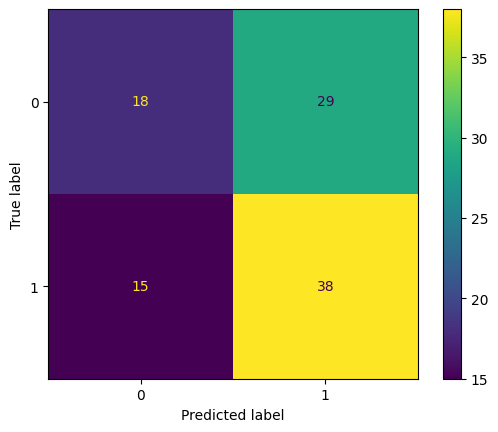

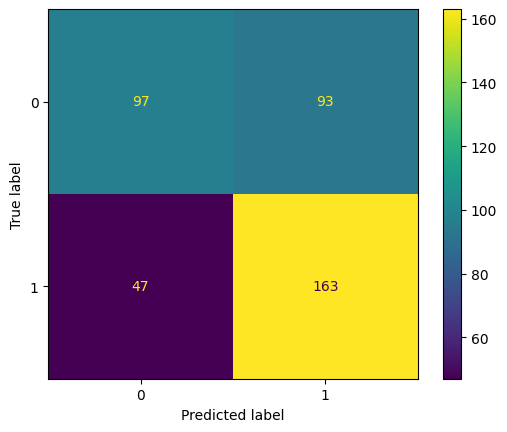

In [80]:
# Define data to consusion matrix display
cm_test = confusion_matrix(y_test, y_pred_test_svc)
print('Test: \n', precision_score(y_test, y_pred_test_svc), '\n')
# Define data to consusion matrix display
cm_test = confusion_matrix(y_test, y_pred_test_svc)
ConfusionMatrixDisplay(cm_test).plot()

# Define data to consusion matrix display
print('Train: \n', precision_score(y_train, y_pred_train_svc), )
# Define data to consusion matrix display
cm_train = confusion_matrix(y_train, y_pred_train_svc)
ConfusionMatrixDisplay(cm_train).plot()



On confsuion matrix of SVM we can see that false positif on test set is 29. It'quite great value

## 3. Model Evaluation K-Nearest Neighbors (KNN)

In [66]:
# Model Prediction

y_pred_train_knn = knn.predict(X_train_final)
y_pred_test_knn = knn.predict(X_test_final)

In [67]:
all_reports = performance_report(all_reports, y_train, y_pred_train_knn, y_test, y_pred_test_knn,"Baseline KN-Negihbors",knn)
pd.DataFrame(all_reports)

,Baseline DT,Baseline SVM,Baseline KN-Negihbors
train - precision,1.000000,0.636719,0.701422
train - recall,0.971429,0.776190,0.704762
train - accuracy,0.985000,0.650000,0.687500
train - f1_score,0.985507,0.699571,0.703088
test - precision,0.537037,0.567164,0.489796
test - recall,0.547170,0.716981,0.452830
test - accuracy_score,0.510000,0.560000,0.460000
test - f1_score,0.542056,0.633333,0.470588
mean - cross validation,0.530321,0.511004,0.506589


Because my object is to search best precesion, so let's look in train, test precision and mean cross validation. In KNN result is to overfit. Range of the valus is  0.3, but it closer to 1.  KNN model will procedure perfom on 0.50 average precision on this dataset, uglier average than other model

Test: 
 0.4897959183673469 

Train: 
 0.7014218009478673


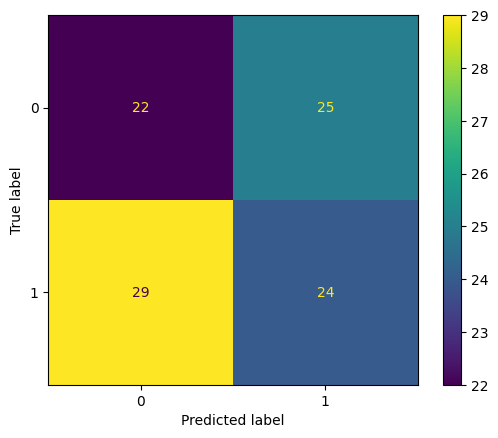

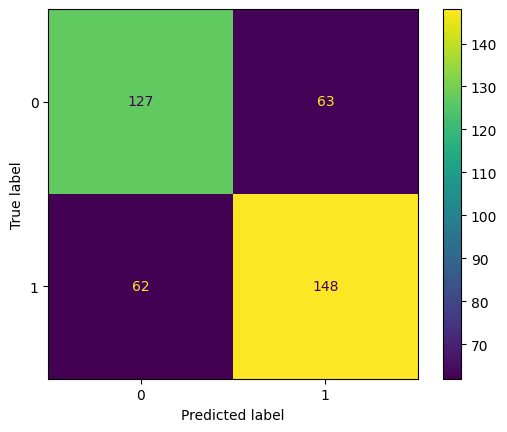

In [81]:
# Define data to consusion matrix display
cm_test = confusion_matrix(y_test, y_pred_test_knn)
print('Test: \n', precision_score(y_test, y_pred_test_knn), '\n')
# Define data to consusion matrix display
cm_test = confusion_matrix(y_test, y_pred_test_knn)
ConfusionMatrixDisplay(cm_test).plot()

# Define data to consusion matrix display
print('Train: \n', precision_score(y_train, y_pred_train_knn), )
# Define data to consusion matrix display
cm_train = confusion_matrix(y_train, y_pred_train_knn)
ConfusionMatrixDisplay(cm_train).plot()



In KNN the confusion matrix false positif that shown in 25 

## 4. Random Forest

In [69]:
# Model Prediction
start_time = time.time()
y_pred_train_rndm = rndm.predict(X_train_final)
y_pred_test_rndm = rndm.predict(X_test_final)

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Process finished --- 0.030399560928344727 seconds ---


In [70]:
all_reports = performance_report(all_reports, y_train, y_pred_train_rndm, y_test, y_pred_test_rndm,"Baseline Random Forest",rndm)
pd.DataFrame(all_reports)

,Baseline DT,Baseline SVM,Baseline KN-Negihbors,Baseline Random Forest
train - precision,1.000000,0.636719,0.701422,0.981132
train - recall,0.971429,0.776190,0.704762,0.990476
train - accuracy,0.985000,0.650000,0.687500,0.985000
train - f1_score,0.985507,0.699571,0.703088,0.985782
test - precision,0.537037,0.567164,0.489796,0.490196
test - recall,0.547170,0.716981,0.452830,0.471698
test - accuracy_score,0.510000,0.560000,0.460000,0.460000
test - f1_score,0.542056,0.633333,0.470588,0.480769
mean - cross validation,0.530321,0.511004,0.506589,0.537137


Test: 
 0.49019607843137253 

Train: 
 0.9811320754716981


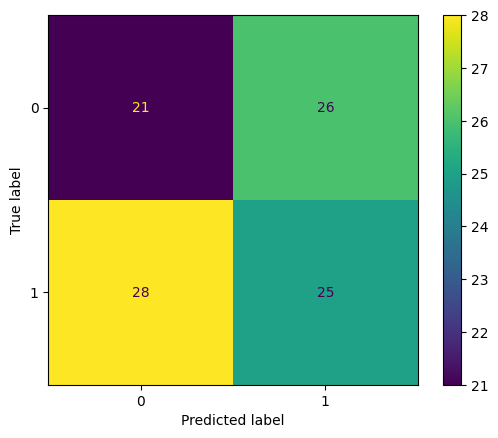

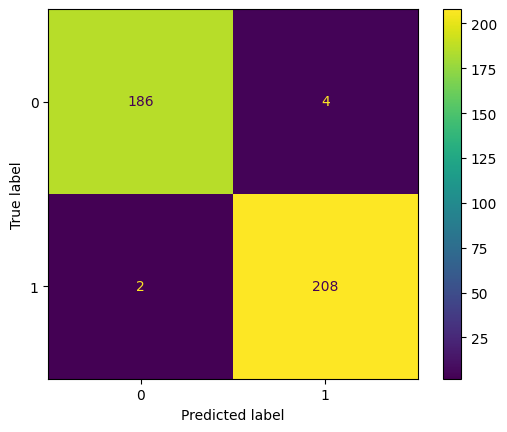

In [82]:
# Define data to consusion matrix display
cm_test = confusion_matrix(y_test, y_pred_test_rndm)
print('Test: \n', precision_score(y_test, y_pred_test_rndm), '\n')
# Define data to consusion matrix display
cm_test = confusion_matrix(y_test, y_pred_test_rndm)
ConfusionMatrixDisplay(cm_test).plot()

# Define data to consusion matrix display
print('Train: \n', precision_score(y_train, y_pred_train_rndm), )
# Define data to consusion matrix display
cm_train = confusion_matrix(y_train, y_pred_train_rndm)
ConfusionMatrixDisplay(cm_train).plot()



In Random Foresr the confusion matrix false positif that shown in 25, it's mean 25 data can detect as false prediction but the actual is positive

## 5. Adabost 

In [72]:
# Model Prediction Adabost
start_time = time.time()
y_pred_train_ad = ada_clf.predict(X_train_final)
y_pred_test_ad = ada_clf.predict(X_test_final)

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Process finished --- 0.024622201919555664 seconds ---


In [73]:
all_reports = performance_report(all_reports, y_train, y_pred_train_ad, y_test, y_pred_test_ad,"Baseline Random Adabost",ada_clf)
pd.DataFrame(all_reports)

,Baseline DT,Baseline SVM,Baseline KN-Negihbors,Baseline Random Forest,Baseline Random Adabost
train - precision,1.000000,0.636719,0.701422,0.981132,0.604255
train - recall,0.971429,0.776190,0.704762,0.990476,0.676190
train - accuracy,0.985000,0.650000,0.687500,0.985000,0.597500
train - f1_score,0.985507,0.699571,0.703088,0.985782,0.638202
test - precision,0.537037,0.567164,0.489796,0.490196,0.564516
test - recall,0.547170,0.716981,0.452830,0.471698,0.660377
test - accuracy_score,0.510000,0.560000,0.460000,0.460000,0.550000
test - f1_score,0.542056,0.633333,0.470588,0.480769,0.608696
mean - cross validation,0.530321,0.511004,0.506589,0.537137,0.537674


Because my object is to search best precesion, so let's look in train, test precision and mean cross validation. In Adaboost result is  overfit. Range of the valus is  0.04.  Adaboost model will procedure perfom on 0.53 average precision on this dataset

Test: 
 0.5645161290322581 

Train: 
 0.6042553191489362


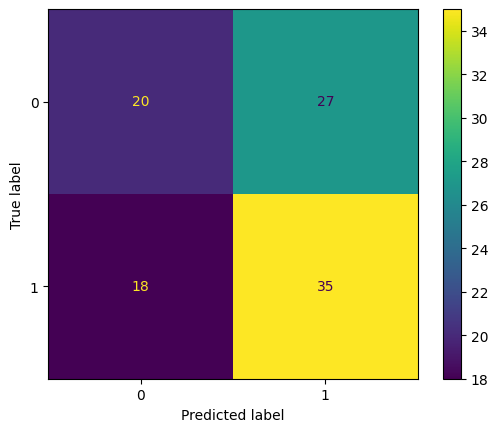

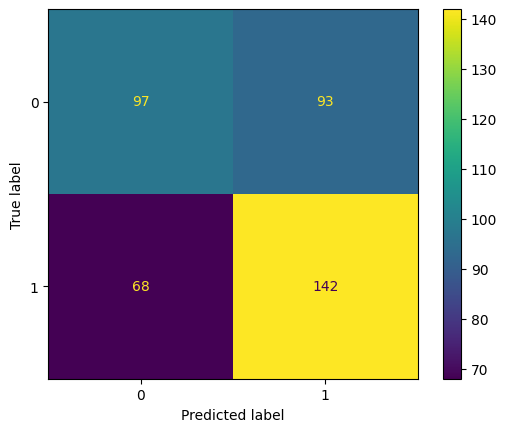

In [83]:
# Define data to consusion matrix display
cm_test = confusion_matrix(y_test, y_pred_test_ad)
print('Test: \n', precision_score(y_test, y_pred_test_ad), '\n')
# Define data to consusion matrix display
cm_test = confusion_matrix(y_test, y_pred_test_ad)
ConfusionMatrixDisplay(cm_test).plot()

# Define data to consusion matrix display
print('Train: \n', precision_score(y_train, y_pred_train_ad), )
# Define data to consusion matrix display
cm_train = confusion_matrix(y_train, y_pred_train_ad)
ConfusionMatrixDisplay(cm_train).plot()



In Random Forest the confusion matrix false positif that shown in 27, it's mean 27 data can detect as false prediction but the actual is positive

# x. Model Improve

##  Model Improve Pipiline with Adabost

In [75]:
# Adabost hyperparameter
best = {'algorithm': 'SAMME.R', 
        'n_estimators': 50}

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('encoder', OrdinalEncoder())
])
categorical_transformer_n = Pipeline([
    ('encodern', OneHotEncoder())
])
# define preprocessing pipeline using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_col),
    ('cat', categorical_transformer,cat_col_o ),
    ('cat_n',categorical_transformer_n,cat_col_n)
])

# Define the pipeline with preprocessing and classification steps
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(**best))
])

# Fit pipeline into Train
pipeline.fit(X_train, y_train)

# Predict into Train
y_pred_train_pipe = pipeline.predict(X_train)
y_pred_train_pipe

# Predict into Test
y_pred_test_pipe = pipeline.predict(X_test)
y_pred_test_pipe

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [76]:
pipecv = AdaBoostClassifier(**best)

In [77]:
all_reports = performance_report(all_reports, y_train, y_pred_train_pipe, y_test, y_pred_test_pipe,"Pipeline Adabost n_estimator: 50",pipecv)
pd.DataFrame(all_reports)

,Baseline DT,Baseline SVM,Baseline KN-Negihbors,Baseline Random Forest,Baseline Random Adabost,Pipeline Adabost n_estimator: 50
train - precision,1.000000,0.636719,0.701422,0.981132,0.604255,0.608511
train - recall,0.971429,0.776190,0.704762,0.990476,0.676190,0.680952
train - accuracy,0.985000,0.650000,0.687500,0.985000,0.597500,0.602500
train - f1_score,0.985507,0.699571,0.703088,0.985782,0.638202,0.642697
test - precision,0.537037,0.567164,0.489796,0.490196,0.564516,0.548387
test - recall,0.547170,0.716981,0.452830,0.471698,0.660377,0.641509
test - accuracy_score,0.510000,0.560000,0.460000,0.460000,0.550000,0.530000
test - f1_score,0.542056,0.633333,0.470588,0.480769,0.608696,0.591304
mean - cross validation,0.530321,0.511004,0.506589,0.537137,0.537674,0.537674


From baseline i choose adaboost to hyperparameter, cause tha value of train - test of precesision is not further overfit and mean from cross validation is better than other model. So i use hyperparameter for perhaps to increase the value of precesison. The result of hyperparameter adaboost is are the same with baseline. This can be seen in the average of both

Test: 
 0.5483870967741935 

Train: 
 0.6085106382978723


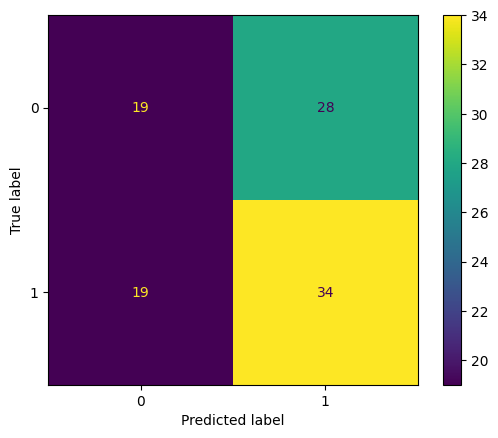

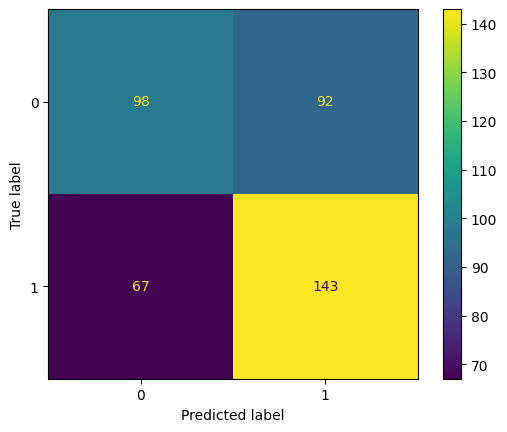

In [84]:
# Define data to consusion matrix display
cm_test = confusion_matrix(y_test, y_pred_test_pipe)
print('Test: \n', precision_score(y_test, y_pred_test_pipe), '\n')
# Define data to consusion matrix display
cm_test = confusion_matrix(y_test, y_pred_test_pipe)
ConfusionMatrixDisplay(cm_test).plot()

# Define data to consusion matrix display
print('Train: \n', precision_score(y_train, y_pred_train_pipe), )
# Define data to consusion matrix display
cm_train = confusion_matrix(y_train, y_pred_train_pipe)
ConfusionMatrixDisplay(cm_train).plot()



In Random Forest the confusion matrix false positif that shown in 28, it's mean 28 data can detect as false prediction but the actual is positive

# xi. Model Saving

In [79]:
with open('model_pipeline_adabost.pkl', 'wb') as file_1: # To save model with best result, in this case the model is svm with parameter 
    pickle.dump(pipeline,file_1)

# xii. Conclusion

## Correlation about dataset

Employee that has age in 35 and 39 most satisfied with the job, but for value of correlation in age with satisfied is negative.  In job level at 5, many satisfied workers. this can be explain with [artikel](https://www.trinamics.nl/en/blogs/6-factors-for-your-job-satisfaction) that show where your works are challenging,this creates a challenge. cause boredom is more likely to strike when the work becomes monotonous and not challenging. In that link so show level of the salary is an importan factor of employe satisfied. This dataset show that employee where is not on site is more satisfied, 

## Narrative Model Analysis

### Matrix used
Matrix that i Used is False Positive, like i want to minimize that employee will predict satisfied but the truth Employees  are dissatisfied because it's maybe will have an impact on work activities

### About Model

From  5 model baseline are overfit precision, in decision tree is to further from train to test. From model Adabost value precision shown that is not to overfit but still underfit and adaboost meand of cross validation is good from each model. I decided to hyperparameter turning adaboost. Best parameter that choose is `algorithm': 'SAMME.R','n_estimators': 50`. 

From the result of hyper parameter, is not different from baselin adaboost. It's 0.60 for train and 0.54, but because i use pipe line for hyper it's seem more easy to save model. So i choose adaboost with parameter.

From confusion matrix of adaboost with parameter, value of false positif is 28, it's mean this model can predict 28 data with predict as false and the truth is positive.

## Bussiness can Take

Bussiness can be applied in this case is, an organizer maybe make an event for their employee. This event can be provide benefits to the organization itself and its employees. For the organization it may increase income and for employees it may help to feel comfortable thereby increasing employee satisfaction.

## Improvement to model

For the model can be search any data that support for feature machine learning. so the machine learning can predict more better

# Conceptual Problem

## 1. Bagging

Bagging is short for Bootstrap AGgregating. Baggis it's self means that technique that can increase perfomance of machine learning

How bagging works is involves random sampling from training set. Then every sampling that are same want to fit in every sampling bootsrap and every result of prediction are combined for final prediction. Combined final prediction can do with voting for clasification and average for regresion

## 2. Different Random Forest with Adaboosting

`Random Forest` and `Adaboost` are two of algorithm that can  improve the performance of prediction models. But  Random Forest generates all models independently and combines the results, while boosting generates models sequentially, with each model correcting errors made by the previous model.

My model use Adaboost, cause this model susceptible to overfit


## 3. Cross Validation


Cross Validation is step that use for measure of perfomance of data. Cross Validation can also get a more stable and reliable estimate of how well the model will perform on new, unseen data. Like in this case, i use mean from cross validation on every model to decide that model is good enough or not 